In [9]:
import os
import numpy as np
import pickle

from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from models.AED import Autoencoder

In [10]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'boson/'
RUN_FOLDER = '../run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
print(RUN_FOLDER)

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

../run/vae/0001_boson/


In [11]:
data_file = '../data/data.sav'

with open(data_file, "rb") as f:
    X, Y = pickle.load(f)
    
X = np.asarray(X)
Y = np.asarray(Y)

split = round(len(X)*.85)

x_train = X[:split]
y_train = Y[:split]

x_test  = X[split:]
y_test  = Y[split:]


In [12]:
AE = Autoencoder(
    input_dim = (x_train.shape[1],)
    , encoder_dense_layers = [64,64,128]
    , decoder_dense_layers = [64,64, 35]
    , z_dim = 10
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [13]:
AE.encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 25)                0         
_________________________________________________________________
encoder_dense_0 (Dense)      (None, 64)                1664      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)               0   

In [14]:
AE.decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 128)               0         
_________________________________________________________________
decoder_dense_t_0 (Dense)    (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
decoder_dense_t_1 (Dense)    (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 64)                0   

In [15]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

AE.compile(LEARNING_RATE)

In [33]:
AE.train(     
    x_train, y_train
    , batch_size = BATCH_SIZE
    , epochs = 5000
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

AE.save(RUN_FOLDER)

Epoch 1/100
3400/3400 [==============================] - 0s 51us/step - loss: 4.7846e-05

Epoch 00001: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 2/100
3400/3400 [==============================] - 0s 47us/step - loss: 4.8128e-05

Epoch 00002: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 3/100
3400/3400 [==============================] - 0s 47us/step - loss: 5.1186e-05

Epoch 00003: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 4/100
3400/3400 [==============================] - 0s 50us/step - loss: 4.8756e-05

Epoch 00004: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 5/100
3400/3400 [==============================] - 0s 47us/step - loss: 4.8337e-05

Epoch 00005: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 6/100
3400/3400 [==============================] - 0s 49us/step - loss: 4.5986e-05

Epoch 00006: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 7/100
3400/3400 [=================

Epoch 52/100
3400/3400 [==============================] - 0s 48us/step - loss: 4.8402e-05

Epoch 00052: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 53/100
3400/3400 [==============================] - 0s 58us/step - loss: 5.0390e-05

Epoch 00053: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 54/100
3400/3400 [==============================] - 0s 54us/step - loss: 4.7810e-05

Epoch 00054: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 55/100
3400/3400 [==============================] - 0s 56us/step - loss: 4.9000e-05

Epoch 00055: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 56/100
3400/3400 [==============================] - 0s 50us/step - loss: 4.7423e-05

Epoch 00056: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 57/100
3400/3400 [==============================] - 0s 49us/step - loss: 4.7305e-05

Epoch 00057: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 58/100
3400/3400 [==========

In [34]:
def load_model(model_class, folder):
    
    with open(os.path.join(folder, 'params.pkl'), 'rb') as f:
        params = pickle.load(f)

    model = model_class(*params)
    model.load_weights(os.path.join(folder, 'weights/weights.h5'))

    return model

In [35]:
AE2 = load_model(Autoencoder, RUN_FOLDER)

In [36]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_test   = y_test[example_idx]

z_points = AE2.encoder.predict(example_images)
print('z_points: ', z_points)
reconst_images = AE.decoder.predict(z_points)
print('reconstituted: {}'.format(reconst_images))

z_points:  [[-0.11708182 -4.5350184  -1.0645695   2.013987   -0.3739948  -2.2331932
   0.3224868  -2.5123951  -1.9303412  -0.9633518 ]
 [ 0.9017153  -1.0895883  -0.12569489 -0.33503237  0.83213913  1.4464267
  -2.0682023   0.11575639  1.1925424  -2.579993  ]
 [ 1.3968351  -2.2889476  -0.79852855 -0.9661145   1.7189561  -0.62484264
   0.9155003   0.71873003  0.7547015  -0.530504  ]
 [-0.5777904  -2.38537     1.6150945   1.9494593  -0.9462226  -0.16612156
   0.239005   -2.1426878  -0.02254387  0.5104094 ]
 [ 0.3889547  -1.5539316   0.26124072  0.922932   -3.1271958  -0.75158596
  -0.23219141 -0.32619286 -1.4386609  -2.1803973 ]
 [-0.1498767   0.6163889   0.06309542 -0.20176232  1.2976067   0.5651977
  -1.8086138   1.9820828   0.83447456 -1.7248845 ]
 [ 0.46749428 -2.9696891  -0.8473915   1.5178318   1.7405121  -0.72607815
  -1.6597294  -1.7693437  -1.8046365  -3.2730978 ]
 [-0.56729764  0.5338082   2.1878202   1.9491308   0.26806194 -0.17332351
  -0.64972234  1.0457748  -2.721073    0.09

In [37]:
print(z_points[0])

[-0.11708182 -4.5350184  -1.0645695   2.013987   -0.3739948  -2.2331932
  0.3224868  -2.5123951  -1.9303412  -0.9633518 ]


In [38]:
print(reconst_images[1])

[3.39746475e-06 2.13533640e-04 1.26022100e-03 5.59717417e-04
 1.00481510e-03 1.49064064e-02 5.68774343e-03 1.00737035e-01
 2.23978162e-02 2.20313668e-02 2.50193477e-03 1.77416801e-02
 2.74664164e-03 1.01311594e-01 1.91053450e-02 1.77606940e-02
 5.60127497e-02 2.13509798e-02 8.81647468e-02 1.43651366e-02
 7.80820847e-05 1.38297677e-03 3.03298235e-04 1.77060068e-02
 2.72727013e-03 1.88063979e-02 2.36520499e-01 1.36808455e-02
 1.01332664e-02 2.81633735e-02 2.57336795e-02 5.97205758e-03
 2.29236186e-02 1.17596626e-01 2.02022791e-02]


In [39]:
print(sum(reconst_images[1]))

1.0317938327789307


Text(0.5, 1.0, 'AE')

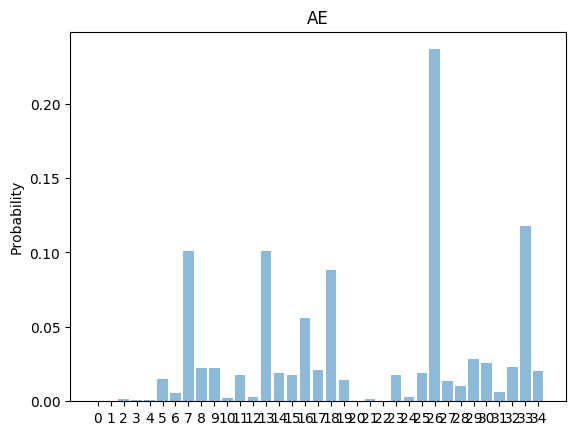

In [41]:
y_pos = np.arange(len(reconst_images[1]))

objects = list(range(len(reconst_images[1])))

plt.bar(y_pos, reconst_images[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('AE')

Text(0.5, 1.0, 'Actual')

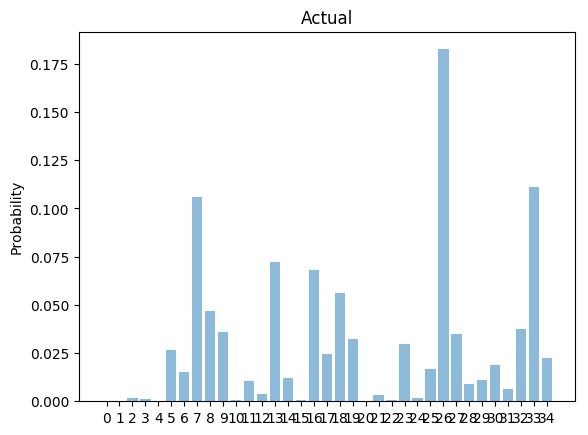

In [42]:
y_pos = np.arange(len(reconst_images[1]))

objects = list(range(len(reconst_images[1])))

plt.bar(y_pos, example_test[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Actual')

In [42]:
y_test

array([[4.23572247e-08, 2.41180652e-05, 2.58120819e-03, ...,
        8.86679856e-02, 4.32124210e-02, 1.12131722e-01],
       [6.82488121e-09, 9.51530595e-06, 2.72418618e-03, ...,
        3.00766188e-02, 4.07118203e-02, 1.04692042e-01],
       [1.32508009e-04, 3.16016820e-03, 2.38207480e-02, ...,
        9.38891430e-02, 3.73499649e-03, 1.10064588e-01],
       ...,
       [2.45019070e-08, 2.52443812e-05, 4.27500454e-03, ...,
        1.41432926e-02, 1.96084559e-02, 3.95274824e-02],
       [7.21973165e-05, 4.51646662e-03, 5.46103728e-02, ...,
        2.76446732e-02, 4.99007790e-03, 8.50360749e-02],
       [1.29970971e-05, 2.47423324e-04, 1.20711103e-03, ...,
        3.28383442e-03, 3.91871041e-02, 1.31576409e-03]])